In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
files = {
    'sputnik': "Sputnik/rn50_time.csv",
    'aspt': "aspt/measurements.csv"
}

dfs = dict()
for f in files: dfs[f] = pd.read_csv(files[f])

In [3]:
dfs['sputnik'] = dfs['sputnik'].iloc[: , 1:]
dfs['sputnik']['filename'] = dfs['sputnik']['filename'].astype("string")
dfs['sputnik'] = dfs['sputnik'].set_index('filename')
dfs['sputnik'].dtypes
dfs['sputnik']

,time_ms
filename,
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_2_block_group4_2_1.mtx,0.050430
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_1_block_group3_3_1.mtx,0.028190
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_3_block_group_projection_block_group4.mtx,0.035651
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_2_block_group3_5_1.mtx,0.033276
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_1_block_group_projection_block_group4.mtx,0.029939
...,...
dlmc/rn50/magnitude_pruning/0.98/bottleneck_3_block_group3_4_1.mtx,0.015850
dlmc/rn50/magnitude_pruning/0.98/bottleneck_1_block_group3_2_1.mtx,0.013522
dlmc/rn50/magnitude_pruning/0.98/bottleneck_2_block_group_projection_block_group2.mtx,0.020507


In [4]:
dfs['aspt'] = dfs['aspt'].assign(time_ms=dfs['aspt']['preproc_ms']+dfs['aspt']['work_ms'])
dfs['aspt']['filename'] = dfs['aspt']['filename'].astype("string")
dfs['aspt'] = dfs['aspt'].set_index('filename')
dfs['aspt'].dtypes
dfs['aspt']

,preproc_ms,work_ms,time_ms
filename,,,
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_1_1.mtx,0.048077,0.012198,0.060275
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_2_1.mtx,0.047543,0.012421,0.059964
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_1_1.mtx,0.648558,0.044668,0.693226
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_2_1.mtx,0.645890,0.041318,0.687208
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_3_1.mtx,0.639252,0.041086,0.680339
...,...,...,...
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group2.mtx,0.028733,0.014538,0.043271
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group3.mtx,0.029268,0.014586,0.043854
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group4.mtx,0.029471,0.014760,0.044231


In [5]:
joined = pd.merge(dfs['aspt'], dfs['sputnik'], on='filename', how='inner', suffixes=('_aspt', '_sputnik'))
joined

,preproc_ms,work_ms,time_ms_aspt,time_ms_sputnik
filename,,,,
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_1_1.mtx,0.048077,0.012198,0.060275,0.033144
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_2_1.mtx,0.047543,0.012421,0.059964,0.035557
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_1_1.mtx,0.648558,0.044668,0.693226,0.035824
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_2_1.mtx,0.645890,0.041318,0.687208,0.035619
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_3_1.mtx,0.639252,0.041086,0.680339,0.036306
...,...,...,...,...
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group2.mtx,0.028733,0.014538,0.043271,0.027786
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group3.mtx,0.029268,0.014586,0.043854,0.019963
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group4.mtx,0.029471,0.014760,0.044231,0.020896


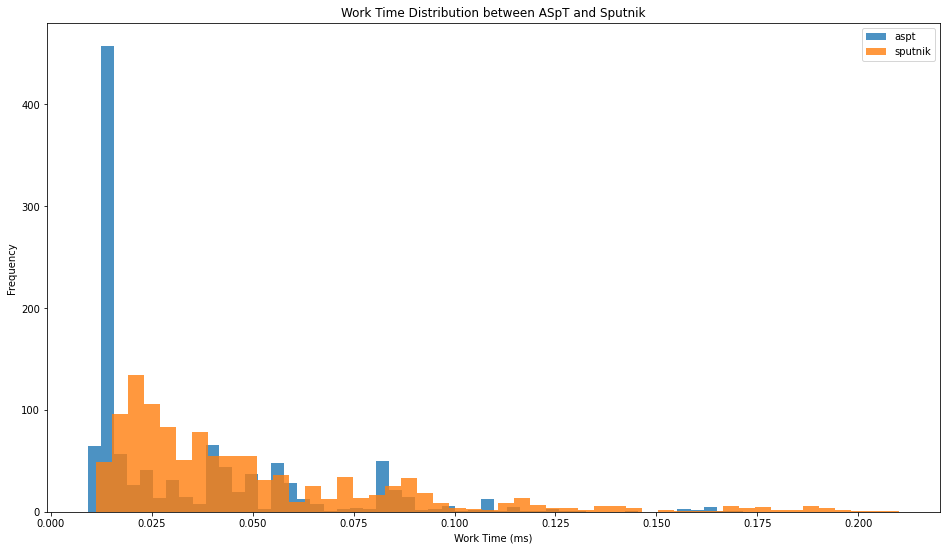

In [6]:
plt.figure(figsize=(16,9))
plt.hist(joined['work_ms'], label='aspt', bins=50, alpha=0.8)
plt.hist(joined['time_ms_sputnik'], label='sputnik', bins=50, alpha=0.8)
plt.legend()
plt.xlabel("Work Time (ms)")
plt.ylabel("Frequency")
plt.title("Work Time Distribution between ASpT and Sputnik")
plt.show()

/tmp/ipykernel_545397/149599778.py:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0)


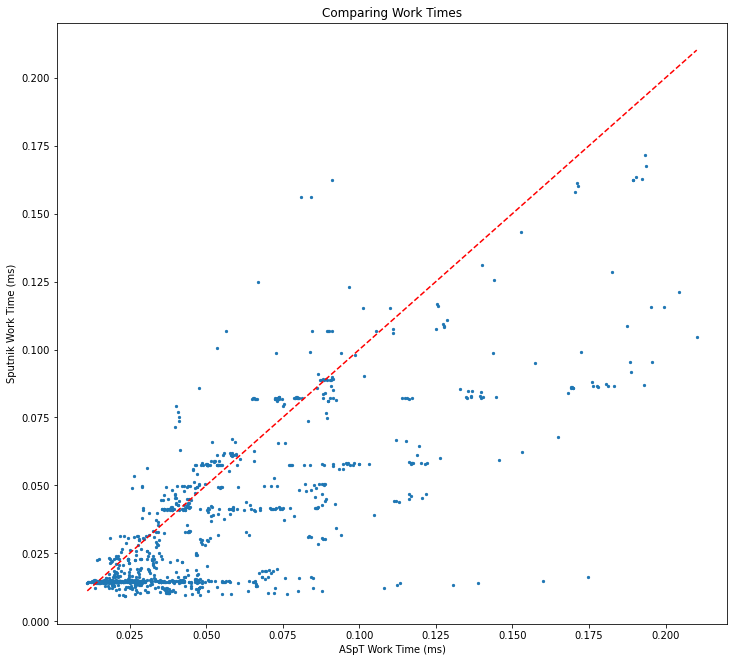

In [10]:
plt.figure(figsize=(10,9))
plt.scatter(joined['time_ms_sputnik'], joined['work_ms'], s=5)

mu, stdev = np.average(joined['time_ms_sputnik']), np.std(joined['time_ms_sputnik'])
m1, m2 = np.amin(joined['time_ms_sputnik']), np.amax(joined['time_ms_sputnik'])
xs = np.linspace(m1, m2)
plt.plot(xs, xs, linestyle='--', c='red')
# plt.legend()
plt.xlabel("ASpT Work Time (ms)")
plt.ylabel("Sputnik Work Time (ms)")
plt.title("Comparing Work Times")
plt.tight_layout(0)
plt.show()

## Plot Runtime by Category

In [8]:
sputnik = dfs['sputnik'].assign(impl='sputnik').reset_index()[['filename', 'time_ms', 'impl']]
aspt = dfs['aspt'].assign(impl='aspt', time_ms=dfs['aspt']['time_ms']).reset_index()[['filename', 'time_ms', 'impl']]
merged = pd.concat((sputnik, aspt))

merged = merged.assign(prefix=merged['filename'].apply(lambda fn: f"{fn.split('/')[2]}_{fn.split('/')[3]}"))
merged = merged.assign(basename=merged['filename'].apply(os.path.basename))
merged

,filename,time_ms,impl,prefix,basename
0,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.050430,sputnik,extended_magnitude_pruning_0.96,bottleneck_2_block_group4_2_1.mtx
1,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.028190,sputnik,extended_magnitude_pruning_0.96,bottleneck_1_block_group3_3_1.mtx
2,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.035651,sputnik,extended_magnitude_pruning_0.96,bottleneck_3_block_group_projection_block_grou...
3,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.033276,sputnik,extended_magnitude_pruning_0.96,bottleneck_2_block_group3_5_1.mtx
4,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.029939,sputnik,extended_magnitude_pruning_0.96,bottleneck_1_block_group_projection_block_grou...
...,...,...,...,...,...
1125,dlmc/rn50/variational_dropout/0.98/bottleneck_...,0.043271,aspt,variational_dropout_0.98,bottleneck_projection_block_group_projection_b...
1126,dlmc/rn50/variational_dropout/0.98/bottleneck_...,0.043854,aspt,variational_dropout_0.98,bottleneck_projection_block_group_projection_b...
1127,dlmc/rn50/variational_dropout/0.98/bottleneck_...,0.044231,aspt,variational_dropout_0.98,bottleneck_projection_block_group_projection_b...
1128,dlmc/rn50/variational_dropout/0.98/final_dense...,0.933662,aspt,variational_dropout_0.98,final_dense.mtx


/home/jim/research/paramath/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


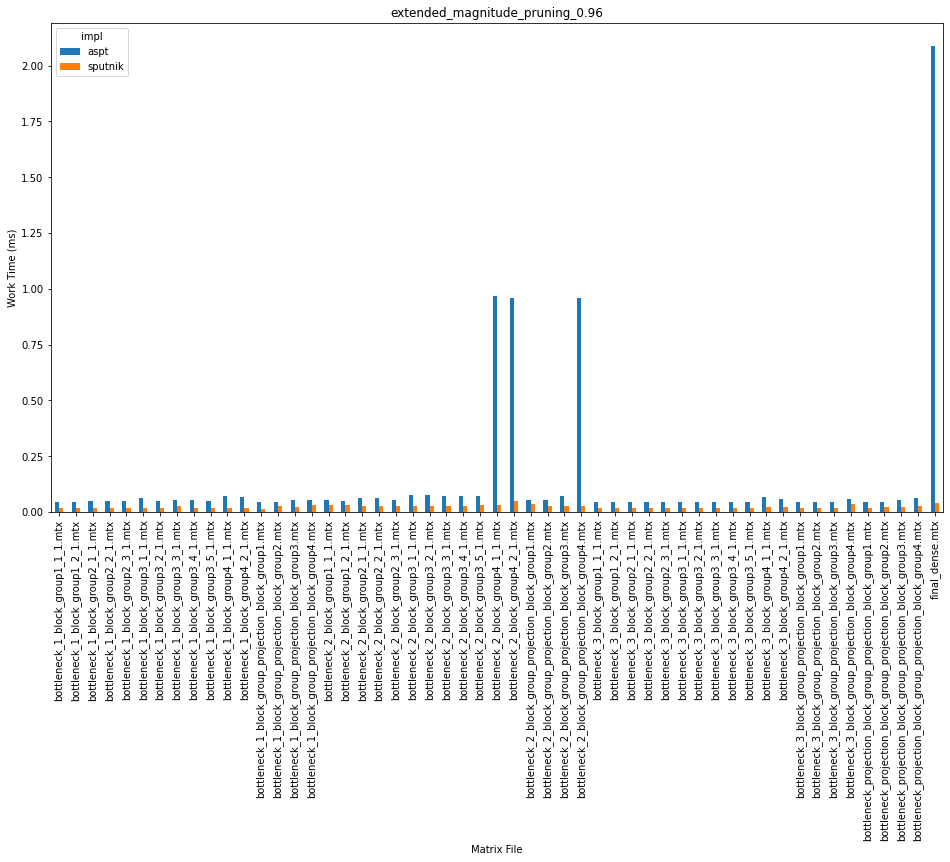

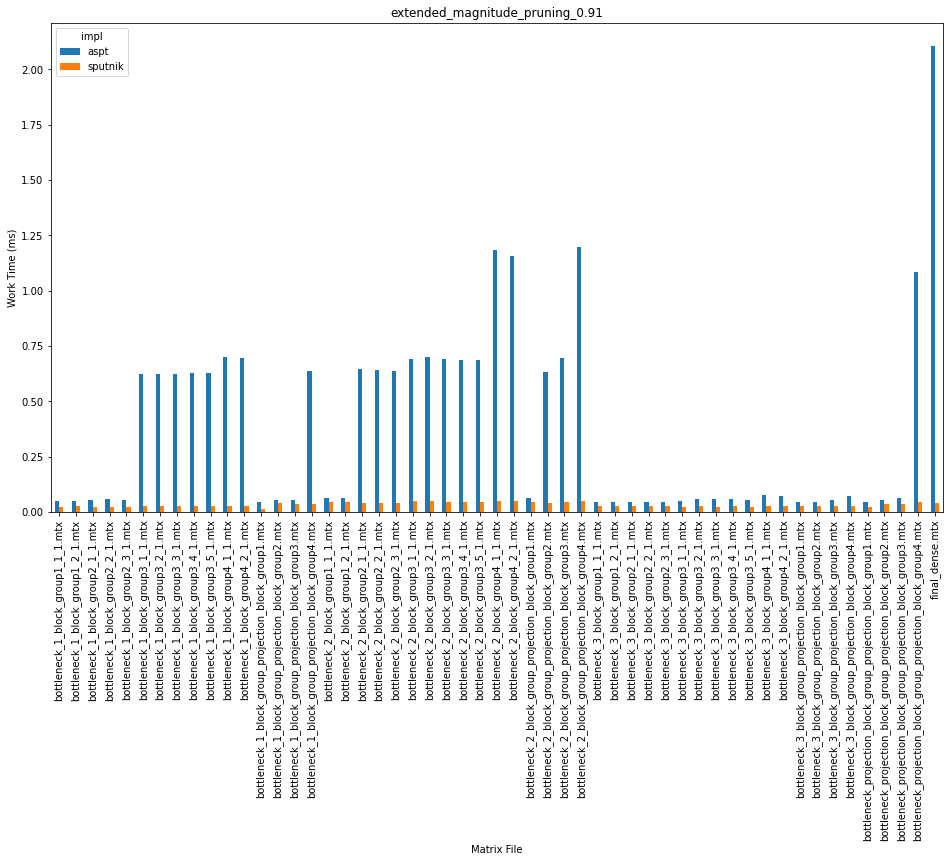

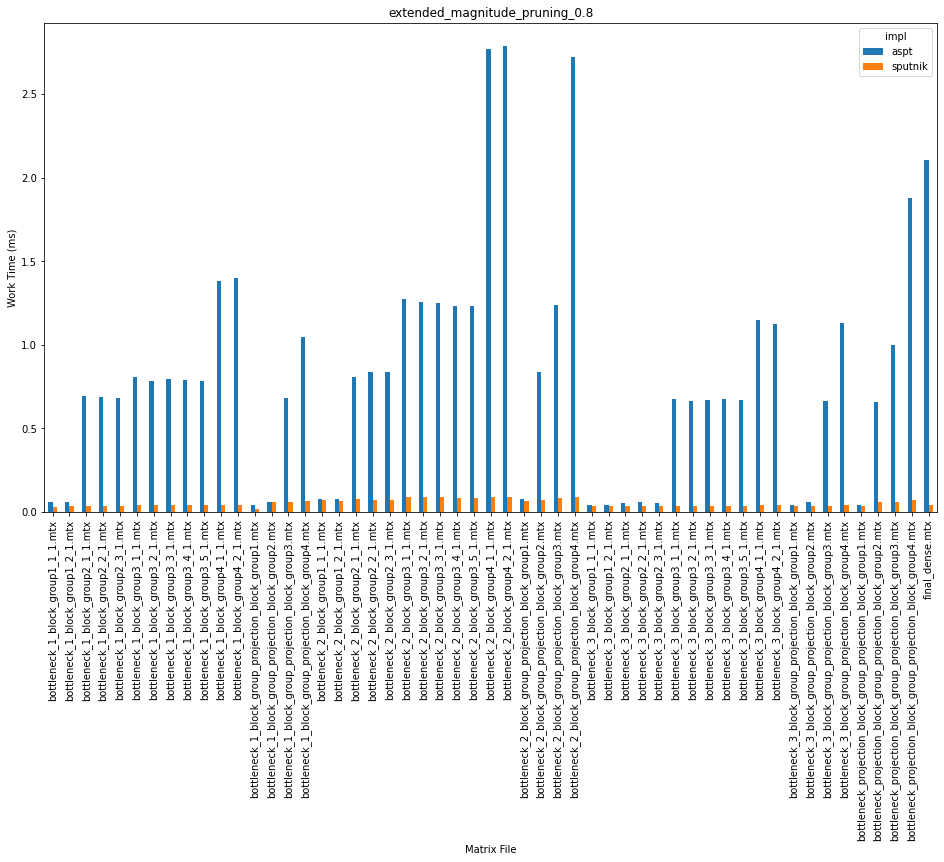

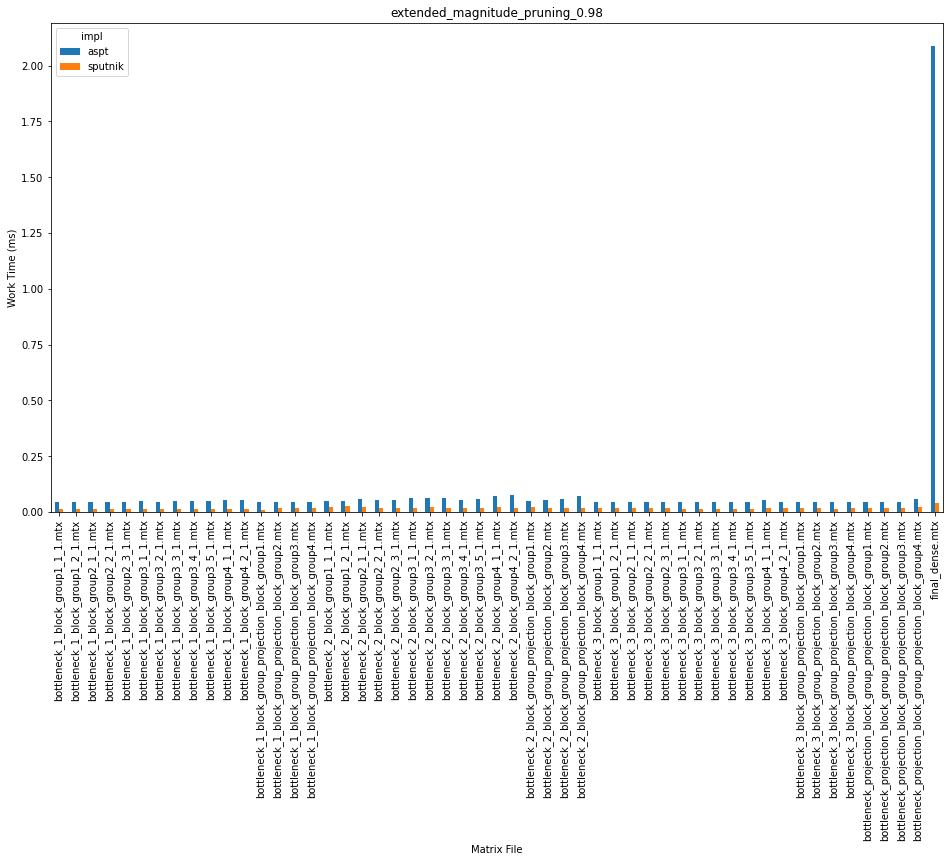

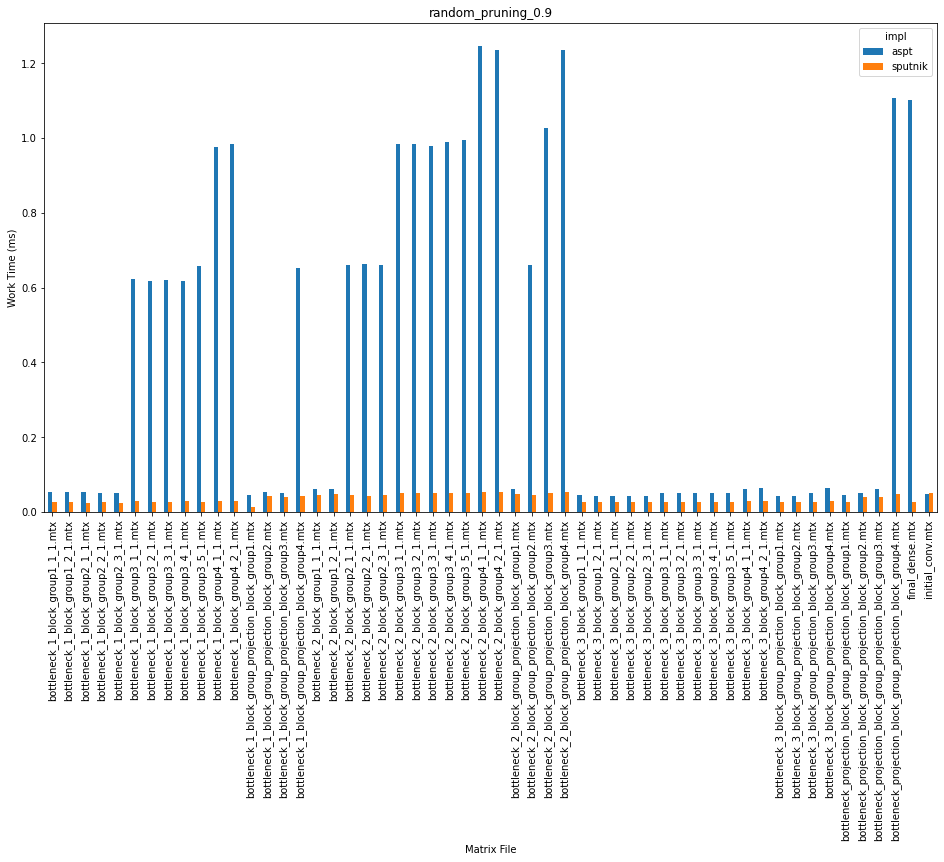

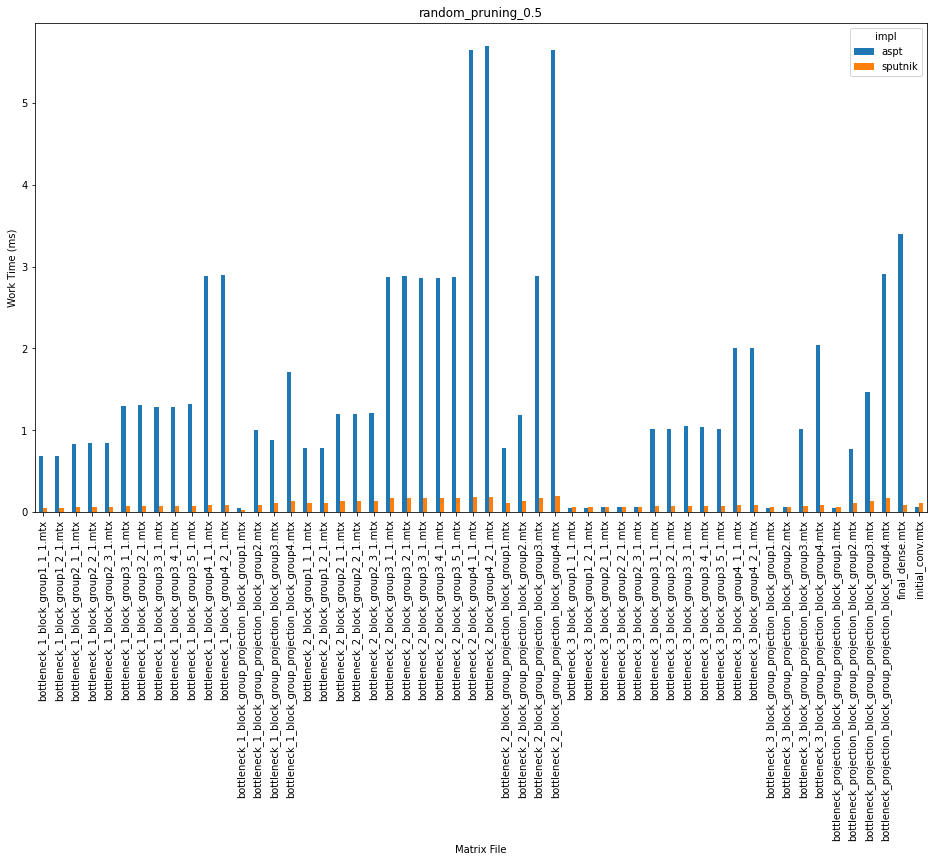

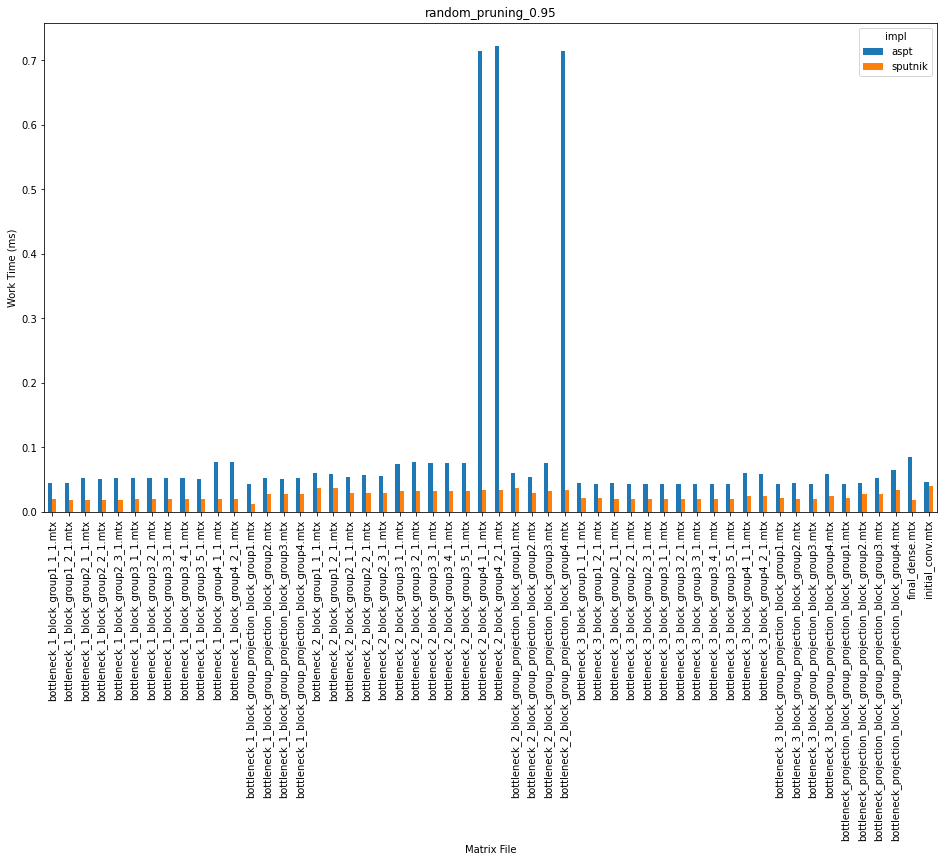

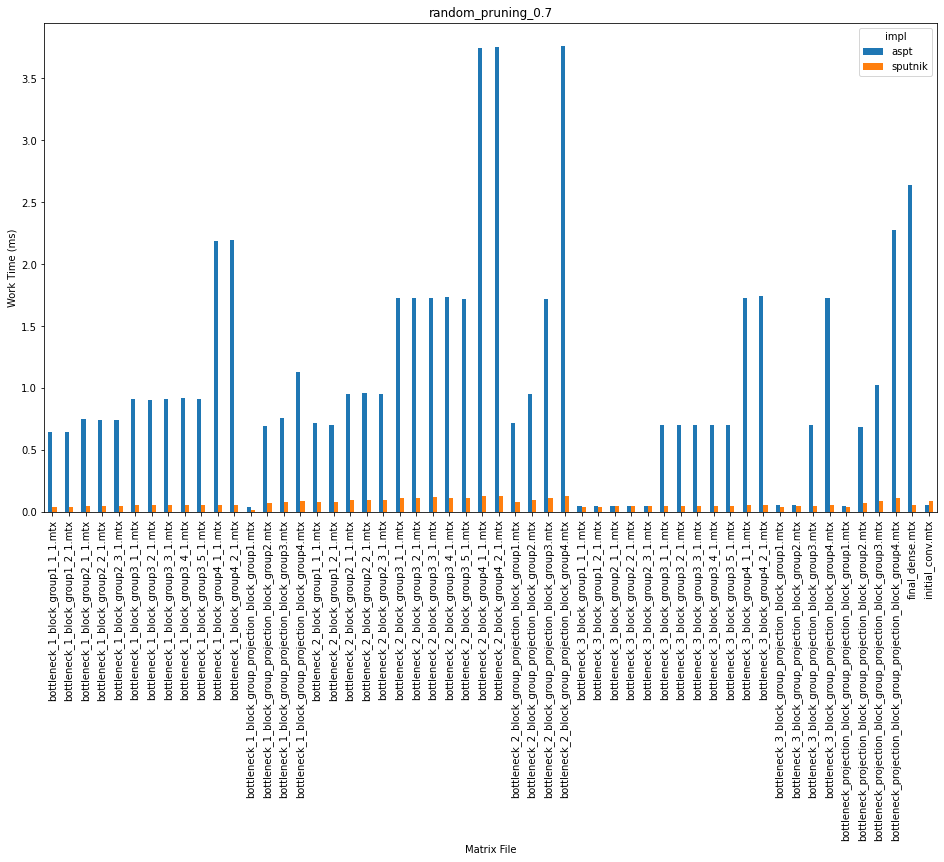

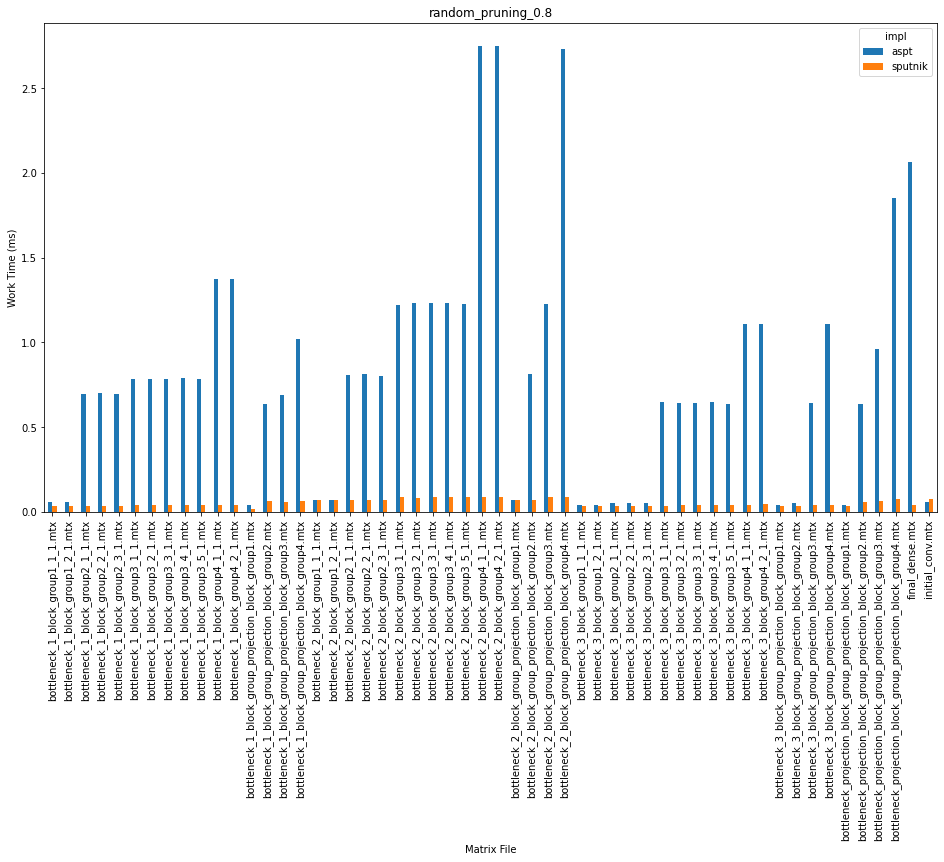

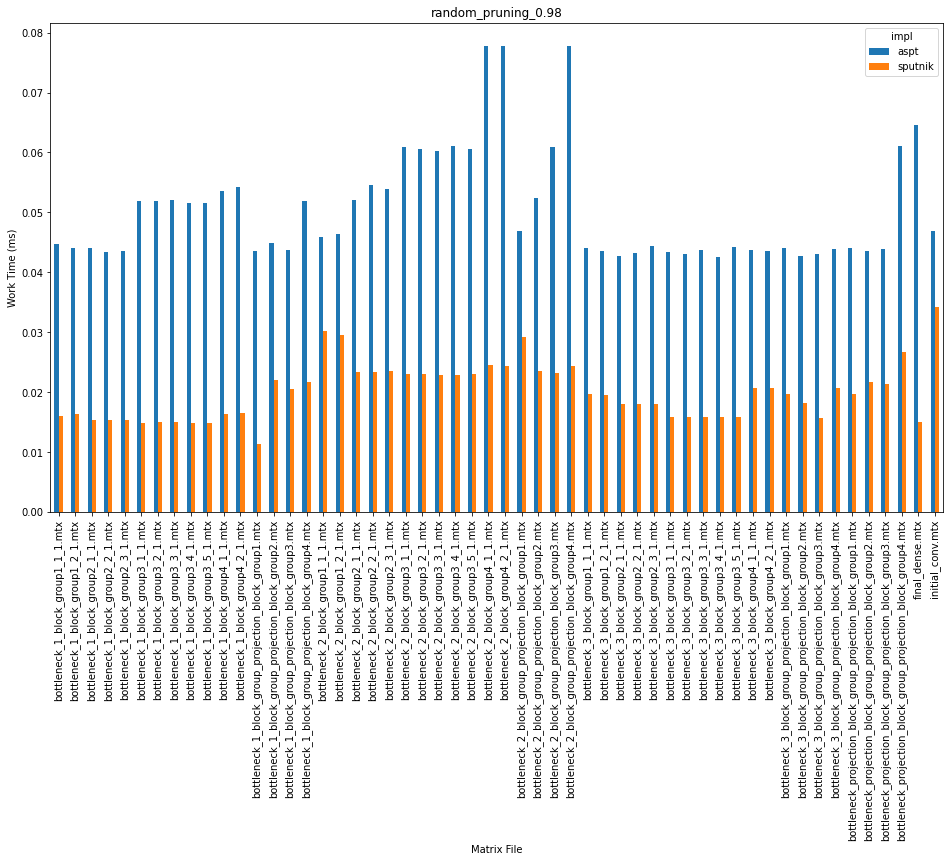

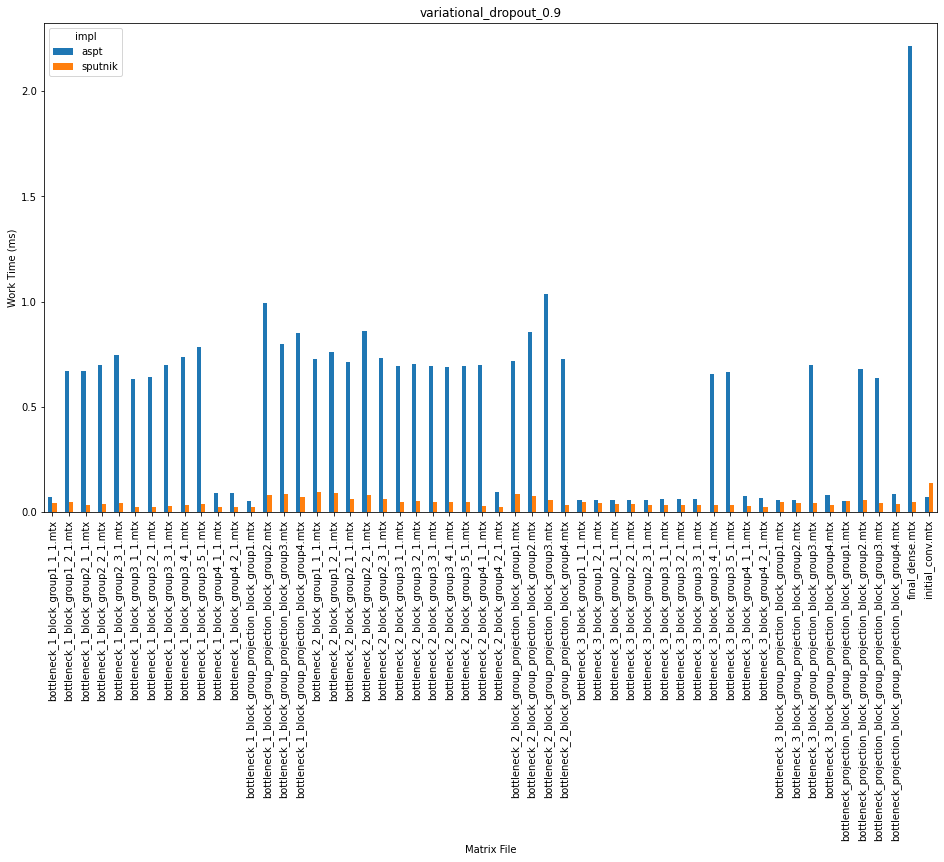

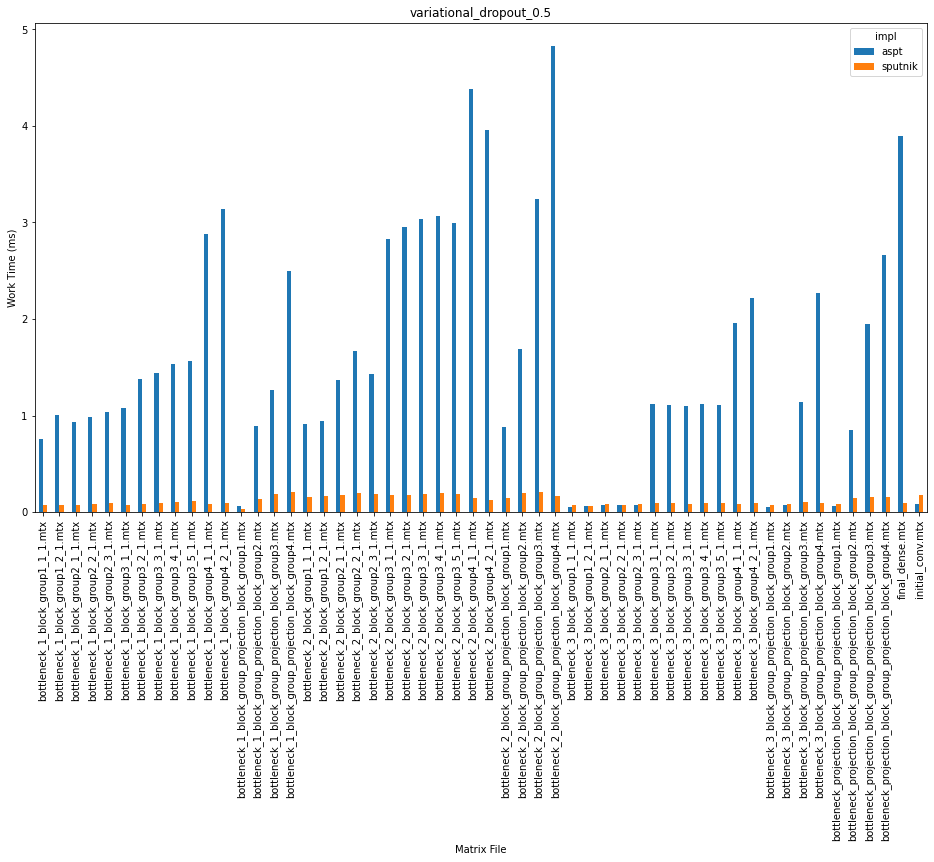

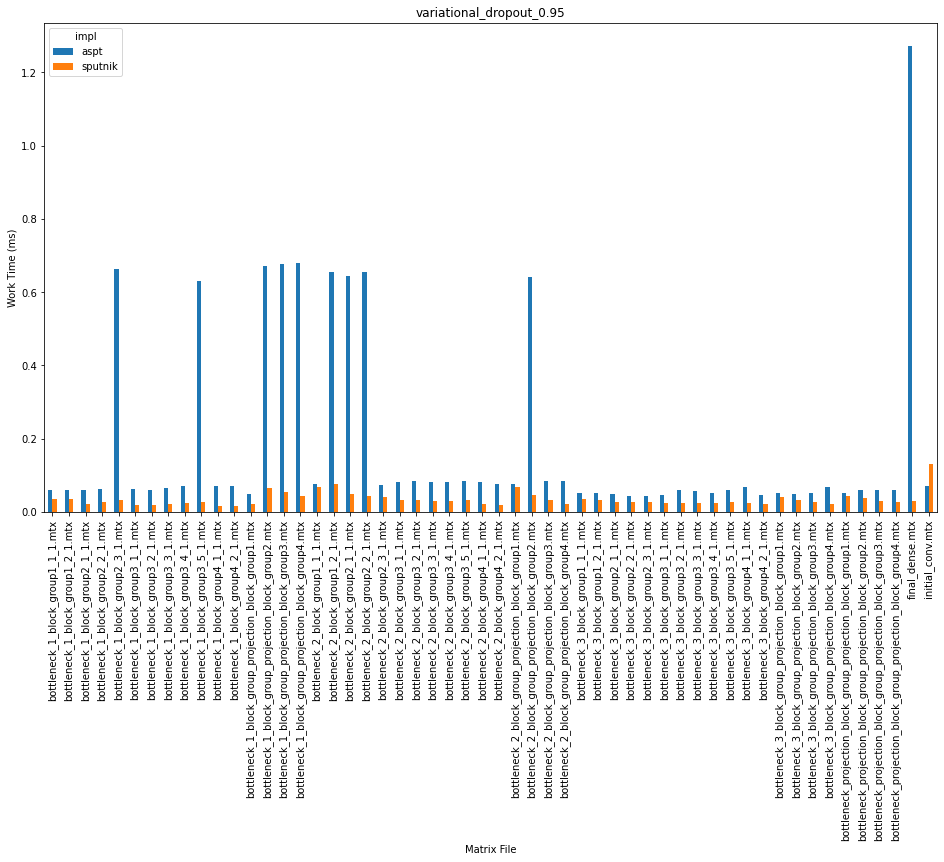

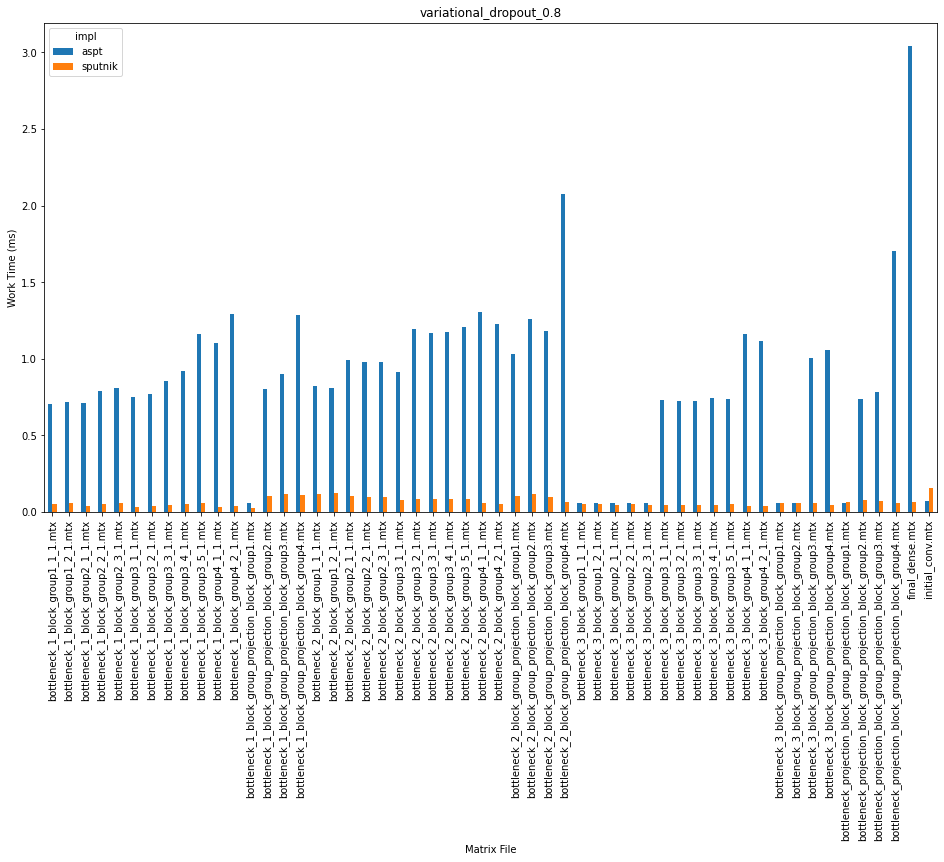

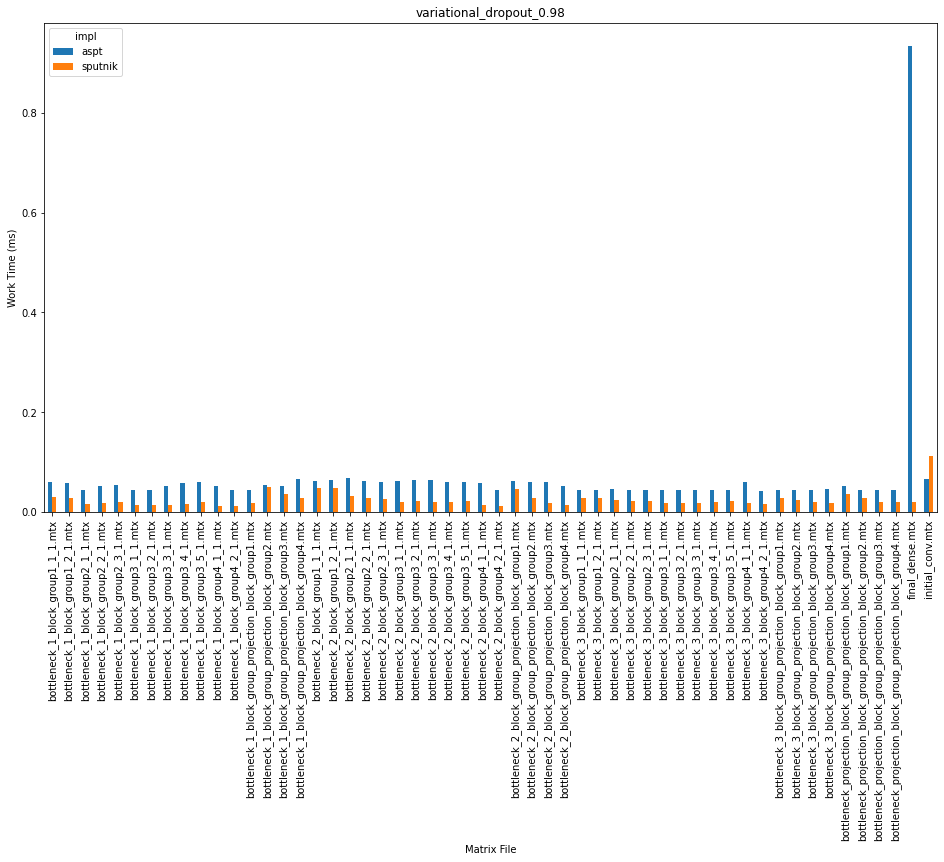

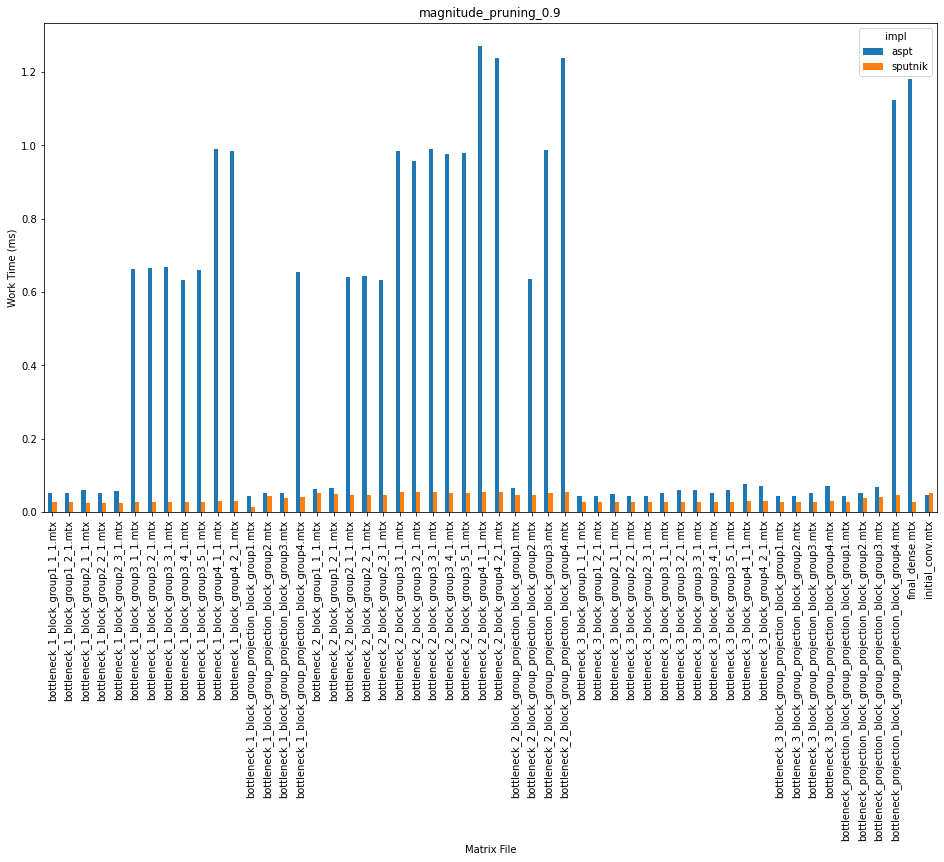

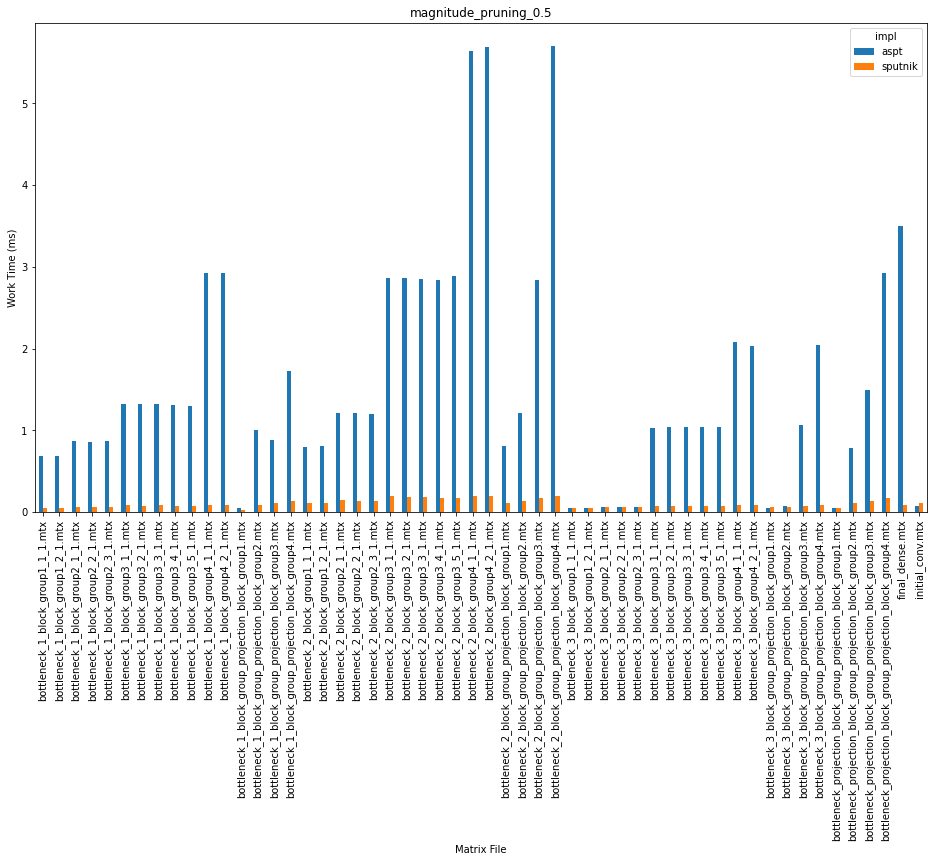

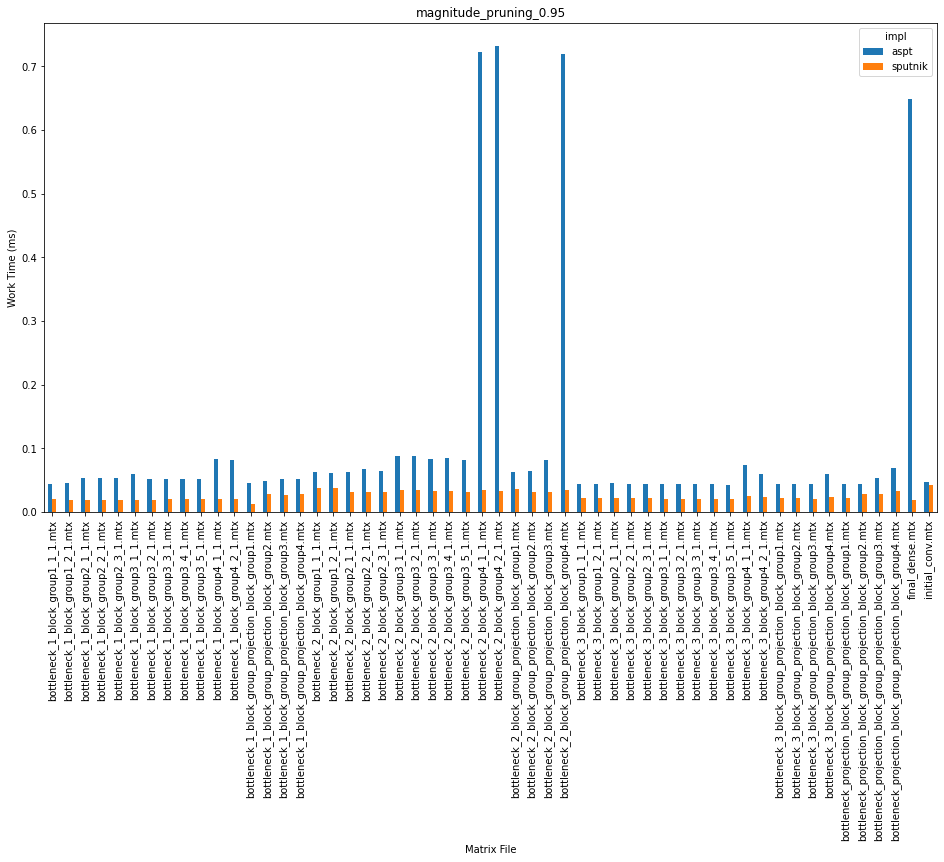

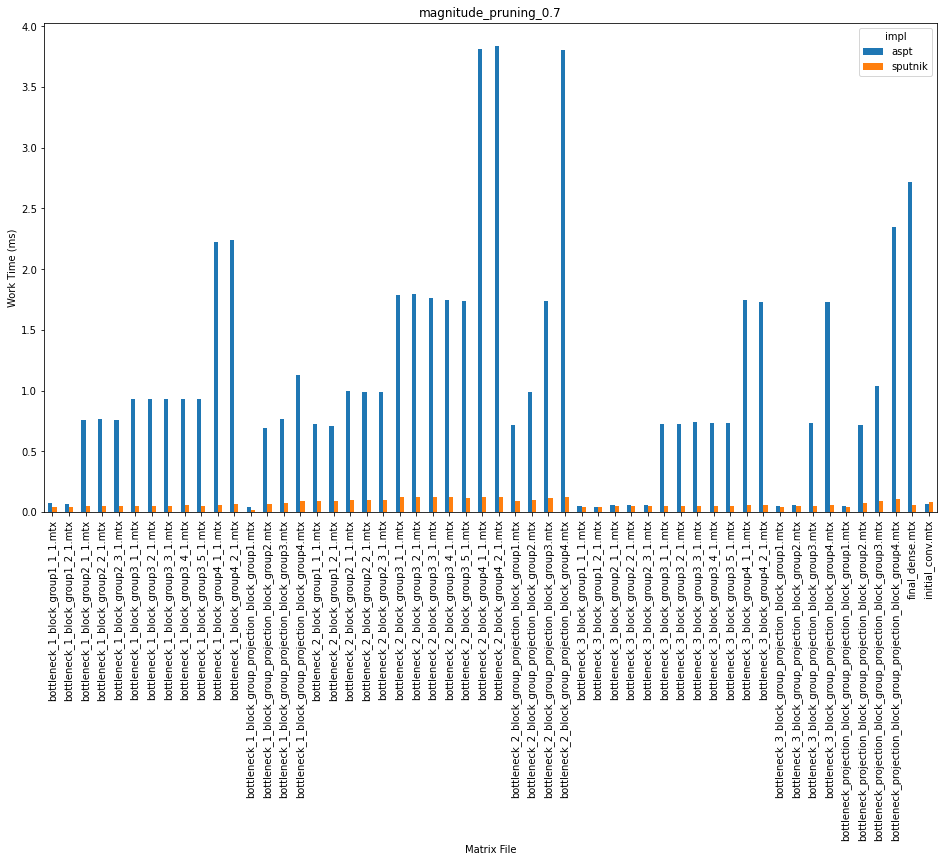

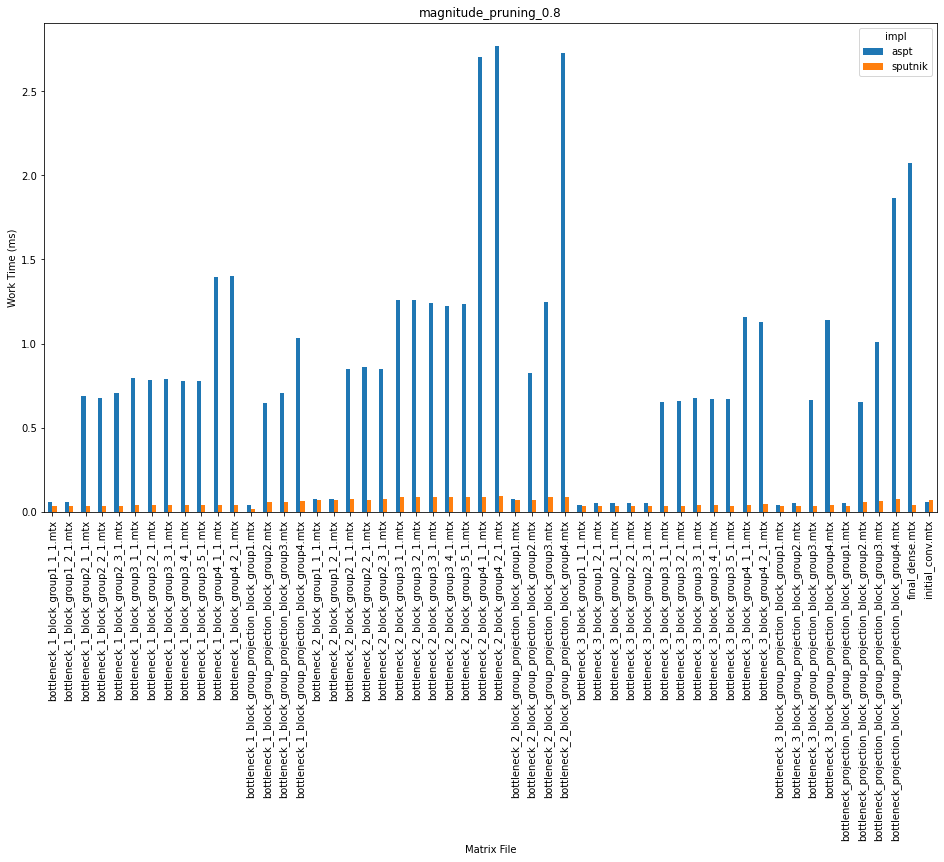

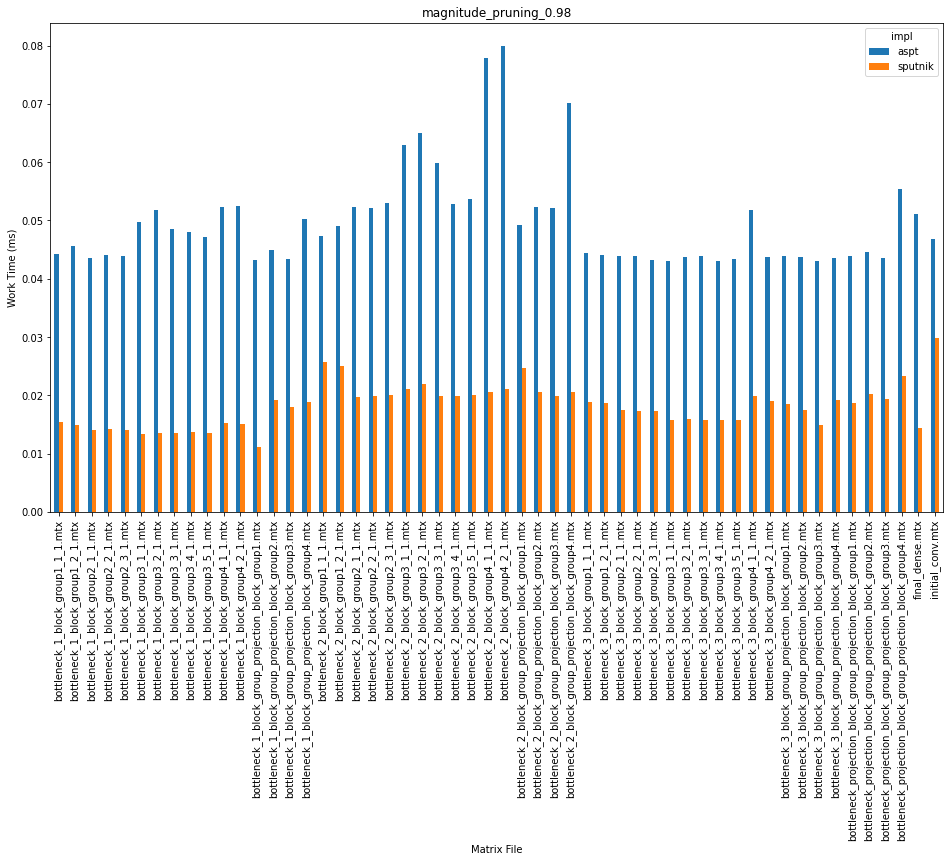

In [9]:
prefixes = merged['prefix'].drop_duplicates().tolist()

for prefix in prefixes:
    filtered = merged[merged['prefix']==prefix]
    filtered.pivot(index='basename', columns='impl', values='time_ms').plot(
        kind='bar',
        figsize=(16,9),
        title=prefix,
        xlabel="Matrix File",
        ylabel="Work Time (ms)"
    )